# Function dependent development in a transport network
## Introduction
### Aims
Feedback between flow and conduit resistance controls pattern formation in similar ways in biological transport systems that differ dramatically in their physiological functions, anatomical structure, and evolutionary history. Understanding shared principles governing these diverse transport systems could suggest ways to improve biologcially inspired optimization algorithms or design impropved transport networks for artificial tissues, among other things. It could also suggest testable hypotheses for how such remarkably intricate systems have evolved. This project focuses on networks that mimic sheet-like bryozoan colonies (e.g. *Membranipora* sp.), because they greatly from systems studied previously, such as plasmodial slimemolds (e.g. physarum) and the vertebrate vasculature. In these colonial animals, the transport system is decentralized and flow passes through a sheetlike space that is connected to the outside of the organism.

Two main questions include: A) Do the consequences of strengthening connections that experience high use depend significantly on the underlying connectivity and physics? And B) what features could give stability to systems that use this kind of feedback? 

### Background
Colonies of the bryozoan *Membranipora* are composed of sheets of individuals (zooids) with tentacle crowns (lophophores). Each individual, living in its coffin shaped box, has its own gut, muscles, and nervous system, but individuals share neural signals and nutrients among each other. and the colony grows by budding new individuals at the edges.
![A bryozoan colony (~3cm)](DSCN0618 adjusted2 downsampled.jpg)

Water is pumped into the space under the canopy of tentacle crowns by cilia running along the tentacles. The individuals feed by catching smaller organisms and other particles drawn in with the water current. The water flows under the canopy of tentacles between the stalks supporting the tentacle crowns. For the water to keep flowing, it has to exit the colony, so the tentacle crowns in some patches of individuals grow taller than their neighbors and spread aside to form a chimney-like opening. The individuals at the center of the chimney often degenerate. In this image, flow into the tentacle crowns and out of the chimney is shown by illuminating particles with a laser sheet. The black and white video frames were re-colored in different colors so that long rainbows show fast flow, and short rainbows show slow flow.
![Flow near a chimney (~1 cm wide, ~1/60s per frame)](Colony03NewChimFrontDay4_MaxFrameDifsAsRainbowPlusMedianFrames.jpg)

The crowns are arranged in a hexagonal tiling, so the flow under the canopy of tentacles goes through a hexagonal network of conduits formed by the spaces under pairs of tentacle crowns. The following image shows flow under the canopy and out of the colony, near the growing edge of the colony.
![Flow under the canopy (~1 cm wide, ~1/60s per frame)](Colony10PlanviewDay0_MaxFrameDifsAsRainbowPlusMedianFrames.jpg)

Bryozoans appear to use a similar form of flow-regulated development to the feedback between flow and vessel growth in blood vessels and plasmodial slime molds, but these systems have very different geometries, pumps, functions, and evolutionary histories. In each, conduits with high flow grow and -- possibly, though no data yet for bryoz. -- conduits with low flow shrink. A similar kind of feedback rule also occurs in the nervous and skeletal systems and in wood, with -- of course -- many differences too. Looking at bryozoans might suggest some shared princples across these systems.

### Questions
Questions to address in project:
1) Can chimney pattern be maintained in a non-growing colony with constant network among nodes? Over what range of variation in the relationships among conductivity, regulated parameter (e.g. conductivity), and sensed parameter (e.g. shear or flow speed) can it be maintained?
2) Does chimney pattern remain stable after perturbation (mimicking natural injuries)?
3) To what extent does flow-regulation of conductivity enhance function (e.g. reduce costs of pumping + material, or maximize excurrent velocity) when the control mechanism does not match the physics precisely? (e.g. how well does it tolerate changes in the relationship between geometry and conductivity with epibiont fouling?)
4) Can flow-regulation of conduit size explain formation of chimney pattern as the colony grows?

# Solving for pressure: general network

Inflow vector is a column matrix of flows ($\ q_k $) into each interior node (counting from node 0 to node z-1, as in Python; exterior node is node z). The inflow vector is: 

$\ \mathbf{q} = \begin{bmatrix} q_0 \\ q_1 \\ \vdots \\ q _{z-1}\\ \end{bmatrix} $

Conservation of volume means that flow into the node from the exterior ($\ q_{in, k} $) is equal to outflow from the node to all other nodes. In addition, the outflow from the node along each edge is pressure differences along each conduit (edge) multiplied by the conductivity of the conduit. With $\ N(C)_{i, j} $ the conductivity at the edge connecting node i to node j, and $\ p_j $ the pressure (p) at node j (exterior node is node z), this gives:

$$\ q_k = \sum_{j=0}^z -N(C)_{k,j}(p_k-p_j) $$

After rearrangement this gives:

$$\ q_k = (\sum_{j=0}^z N(C)_{k,j}p_j) - (p_k \sum_{j=0}^z N(C)_{k,j}) $$

Defining a new matrix, G as follows: 

$$\ G_{k,j} = \begin{cases} N(C)_{k,j},  & k \neq j \\
-\sum_{i=0}^z N(C)_{k,i}, & j=k \end{cases} $$

This can be represented as:

$$\ q_k = \sum_{j=0}^z G_{k,j}p_j $$

Or as matrices: $\ \mathbf{q = Gp} $

If one defines a new matrix B, the directed incidence matrix, such that:

$$\ B_{i,j} = \begin{cases} -1,  & \text{edge i begins at node j} \\ 1, & \text{if edge i ends at node j} \\ 0, & \text{otherwise} \end{cases} $$ 

For the bryozoan colony model, with edges from inner nodes to the exterior node in the bottom rows, and edges among interior nodes in the top rows, this is: 

$$\ \mathbf B = \begin{bmatrix} -1 & 1 & 0 & \cdots & 0  & 0 & 0\\ 0 & -1 & 1 & \cdots & 0 & 0 & 0\\ \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\ 0 & 0 & 0 &\cdots & 0 & -1 & 1\\ \end{bmatrix} $$

Define a new diagonal conductivity matrix C such that $\ C_{i,j} = \delta_{i, j} c_i $, with $\ c_i $ the conductivity of edge i ($\ c_i = N(C)_{k,j} \text{ if } B_{i,k} = -B_{i,j} = \pm1 $), and w is the number of edges:

$$\ \mathbf C = \begin{bmatrix} c_0 & 0 & \cdots  & 0 \\ 0 & c_1 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & c_{w-1}\\ \end{bmatrix} $$

Then (see '1' below): 
$$\ G_{k,l} = -\sum_{i=0}^{w} \sum_{j=0}^{z} B_{i,k}C_{i,j}B_{j, l} $$
$$\ \mathbf{G = -B'CB} $$

Hence, $\ \mathbf{q = -B'CBp} $

This gives more unknowns (pressures at nodes) than knowns (flows into nodes, $\ q_i $). To reduce the number of unknowns to the number of knowns, remove $\ p_z $ and the column of B corresponding to the exterior node ($\ B_{i,z} $). This is equivalent to setting exterior pressure to 0. With these reduced matrices,$\ \mathbf{B_z, p_z}, \mathbf{q = -B_z'CB_zp_z} $

This could be solved directly: $\ \mathbf{(-B_z'CB_z)^{-1}q = G_Z^{-1}q = p_z} $. However it may save time during ODE solving to break calculation of the matrix inverse to break it into steps because the incidence matrix, B, remains unchanged during most steps (unless adding/removing nodes), and C is diagonal, so its inverse is simple: $\ \mathbf{C^{-1}} = C_{i,j} = \begin{cases} 0, & i \neq j \\ 1/C_{i,i}, & i=j \end{cases} $. B and B', are not square, but should [can one prove that they do?] have left inverses: $\ \mathbf{(B_z')_{left}^{-1} = (B_zB_z')^{-1}B_z, B_{z,left}^{-1} = (B_z'B_z)^{-1}B_z'} $ ($\ \mathbf{B_z} $ is not square, so $\ \mathbf{B_z'B_z} $ has different dimensions from $\ \mathbf{B_zB_z'} $, so both matrices have to be calculated separately). $\ \mathbf{G_z^{-1} = -B_{z,left}^{-1}C^{-1}(B_{z}')_{left}^{-1}} $

After testing, there is no inverse of $(B_zB_z')^{-1}$ (numpy can return an array for it, but it appears inaccurate; and, $ det((B_zB_z')^{-1})=0 $). Tried calculating Moore=Penrose pseudoinverse multiplied by incidence matrix: approximated identity matrix, but substantial numerical error ($\mathbf{B_z^+B_z \approx I}$), but pseudoinverse was also very dense: may slow calculations and make them more inaccurate... for now stick with numerical calculation of $\mathbf{G_z^{-1}}$.

But, don't need pseudoinverse of $B_zB_z'$, need peudoinverse of B_z and B_z', so can calculate Moore-Penrose inverse for each of those instead.Unfortunately, $ B_z' $ does not seem to have a left inverse (represents an overdetermined system of equations, so can only get an poor approximation, e.g. by least squares) and $B_z$ does not have a right inverse. 

However, $B_z$ has a left inverse ($li(Bz)$) and $ B_z'$ has a right inverse ($ri(B_z')$). From the definition of a right inverse, $ \mathbf{ -B_z'(-ri(B_z')) = I } \implies \mathbf{-B_z' (-ri(B_z') q_z = I q_z = q_z} $

Hence, $ \mathbf{-B_z' C B_z p_z = q_z} $ is satisfied if $ \mathbf{ C B_z p_z = -ri(B_z') q_z } $.

To solve for $ p_z $, then multiply the equation $ \mathbf{ C B_z p_z = -ri(B_z') q_z } $ by the inverse of C and the left inverse of Bz to eliminate C and Bz: 

$$\ \mathbf{ li(B_z) C^{-1} C B_z p_z = li(B_z) C^{-1} (-ri(B_z')) q_z } $$

Hence, 

$$\ \mathbf{ p_z = - li(B_z) C^{-1} ri(B_z') q_z } $$

This can be simplified a bit because $ \mathbf{ li(B_z)' = ri(B_z') } $

STILL DOESN'T WORK $ C B_z p_z \neq -ri(B_z') q_z $ I think because it's going up to a higher dimensional space (q_z has fewer parameters (dim is number of nodes) than C B_z p_z (dim is number of edges)) so there is room for multiple solutions

Flow along edge k connecting node i to node j is $\ v_k = (p_j-p_i) * N(C)_{i,j} = c_k * \sum_j (B_{k,j}*p_j) $

Or: $\ \mathbf{ v = CBp } $

But: $\ \mathbf{ q = -B'CBp } $

Therefore: $\ \mathbf{ q = -B'v } $ but that will not give unique solution to v...

$\ \mathbf{ v = -CB_z*(B'_zCB_z)^{-1} q } $

if p is right inverse .........

# Topology of bryozoan colony
For the model, each nodes represents the corners where three lophores (crowns of tentacles) meet, the conduits (edges connecting nodes) are the spaces (formed by the gap under a pair of adjacent tentacle crowns) connecting. Flow into the parts of the three tentacle crowns adjoining node j is $q_j$; the conductivity of the space under the pair of crowns separating node j and node k is $N(C)_{j,k}$; flow out the colony to the exterior node (node z) goes through edge $N(C)_{j,z}$; this represents leakage between and within tentacle crowns, including large excurrent openings (chimneys). Note that elements $N(C)_{j,k}$ correspond to elements $c_d$ in the conductivity matrix, C, however, the numbering depends on the order that edges and nodes are listed in the incidence matrix, B.

For the bryozoan colony, the incidence matrix $\mathbf{B_z}$ has dimensions of $num(edges)=n(5m-1)/2 $ by $\ num(nodes)=z=m*n $, where n is the number of nodes running in phalanxes left to right in the colony (twice the number of crowns left-right), and m is the number of nodes top-bottom (same as number of crowns). Each row of Bz shows -1 (node at tail of directed edge) or +1 (node at head of directed edge). For edges from interior node to exterior, Bz only contains the -1 for tail node.

To simplify the geometry, the colony is treated as wrapping around a cylinder in a helix. Conduits connect node k to node k+1 for each node along each phalanx of tentacle crowns, or – for the node at the end of the phalanx (where mod(k,n)=n-1) – node k connects to node k-n. Finally, every other node connects to the one in the phalanx in front of it (to produce the hexagonal pattern). Therefore, for $mod(k,n) \neq n-1$, there is a row d with $B_{d,k+1}=1=-B_{d,k}$, for $mod(k,n)=n-1$ there is a row d with $B_{d,k-n}=1=-B_{d,k}$, and for $mod{k+1,2}=0$ there is a row d with $B_{d,k+n-1}=1=-B_{d,k}$

Flow at the top and bottom boundaries are treated identically: just lumping terms into the flow to the exterior node (and values for outflow conduits for nodes at the colony boundary are not treated differently from others, at present). 

## Justification for feedback function:
------------------------------------
For this version of the model, conduit size is assumed to be influenced by shear stress, as it is in the vertebrate circulatory system. In the vertebrate circulatory system, increased shear stress causes vessel diameter to increase; decreased shear stress causes vessels to shrink. The force balance between shear stress (S) and pressure (p) in a short length ($\ \Delta $L) of a conduit from a fluid transport network will be as follows (assuming one can neglect inertial terms): 
$$ \int_M {S \Delta L dM} = \int_A{\Delta p dA} $$

Here M is the curve of the perimeter, and A is the surface of the cross section, and S and p may vary with position. However, if S is constant around the perimeter, and p is constant across the cross section, $ S M \Delta L = \Delta p A $. Clearly this will not be the case for conduits with irregular cross sections, such as the bryozoan colony, but one could use the average values of S and P to get the same relation.  

Defining h as a shape parameter describing conduit width or height (e.g. radius, width, height...; h has units of length), then perimeter (M) will follow the form $\ M \approx c*h^x, 0 ≤ x ≤ 1 $ Crosssectional area (A) will follow approximately $ A \approx k*h^y, 1 ≤ y ≤ 2 $. Here, c and k are constants. Therefore, assuming conduit length is constant: 
$\ S \approx \Delta p*a*h^{(y-x)} : 0 ≤ (y-x) ≤ 1 \text{ with } a = k/(c*\Delta L) $.

Conductivity of the conduit (C) is proportional to h^w, with 1 ≤ w ≤ 4. Hence: $ h \approx (C/d)^{1/w} $ and: $ S \approx \Delta p (a/(d^z)) C^z; z=(y-x)/w, \beta=a/(d^z) $

Three cases give a range of values:

    If h is the separation between parallel plates: x = 0, y = 1, w = 3 : z = 1/3
    If h is the height of vertical parallel plates: x = 1, y = 1, w = 1 : z = 0
    If h is the radius of cylinder:                 x = 1, y = 2, w = 4 : z = 1/4

Therefore, set $\ S = \beta*C^z*\Delta p, 0 ≤ z ≤ 1/3 $

$$\ S_i = \beta* | \sum_i (C_{i,j}^z* \sum_k B_{j,k}*p_k) | $$

Assuming $\ dh/dt=r*(S-s0) $, and $\ dC/dt = (w*d*h^{w-1})*dh/dt $, then:
$$\ dC/dt = w*d*(C/d)^{(w-1)/w}*r*(S-s0) $$
$$\ dC/dt = w*d^{(2w-1)/w} * C^{(w-1)/w)}*r(S-s0) $$ 
One can set parameters such that:
$$\ dC_{i,j}/dt = r^* *(C_{i,j}^{(w-1)/w})*(S_j^*-1) $$

*This is what I used for 'Bryozoan.dCdt_default', but I think it would be useful to 1) incorporate the dimensions of the parameters lumped into r and beta to see how they might be coupled to z and w; 2) incorporate a minimum conductivity; 3) develop in a way that clarifies the separation between the physical relations among C, p, & q, and the relations among the sensed (S) and controlled (h) parameters.

<IPython.core.display.Javascript object>


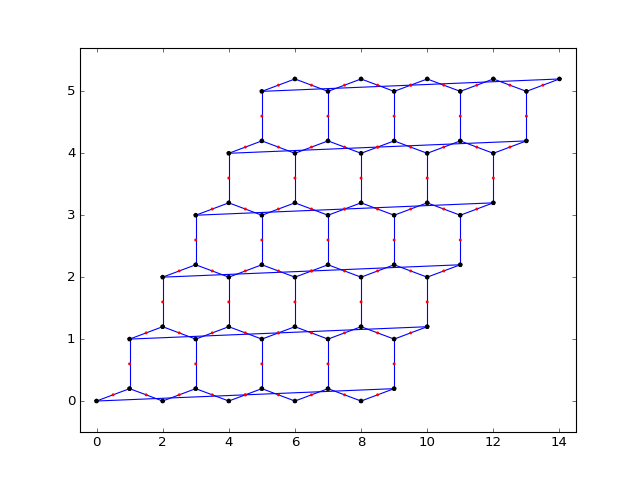

<IPython.core.display.Javascript object>


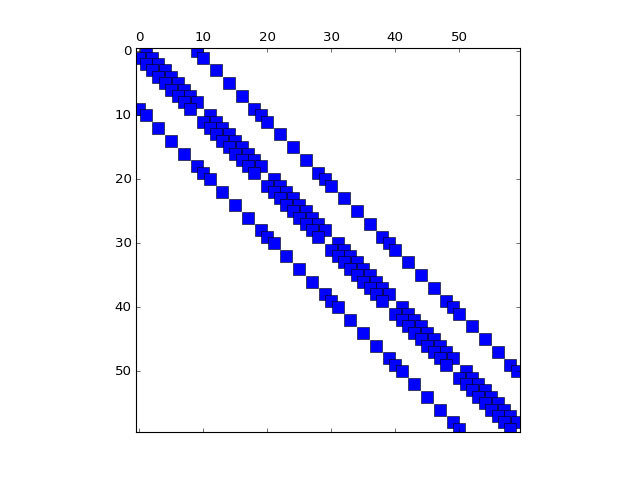

"\nFigure 1: Topology of the colony. Blue lines indicate edges (conduits) connecting interior nodes;\ndark dots indicate edges (conduits) to the exterior node. Note the long blue lines where the left\nand right edges wrap around (this is meant to simulate a cylinrical colony, but for clarity of\nthe topology it's flattened).\n\nFigure 2: Spy plot of the incidence submatrix for the interior edges (not including the\nconduits/edges to the exterior node).\n"

In [3]:
"""
'Bryozoan.py' is contains a class definition for generating a colony with the geometry defined above.
"""

import Bryozoan as bryo
%matplotlib notebook
CrownsInPhalanx = 5
NumPhalanxes = 6
c1=bryo.Colony(nz=CrownsInPhalanx, mz=NumPhalanxes)
c1.colonyplot()

"""
Figure 1: Topology of the colony. Blue lines indicate edges (conduits) connecting interior nodes;
dark dots indicate edges (conduits) to the exterior node. Note the long blue lines where the left
and right edges wrap around (this is meant to simulate a cylinrical colony, but for clarity of
the topology it's flattened).

Figure 2: Spy plot of the incidence submatrix for the interior edges (not including the
conduits/edges to the exterior node).
"""

<IPython.core.display.Javascript object>


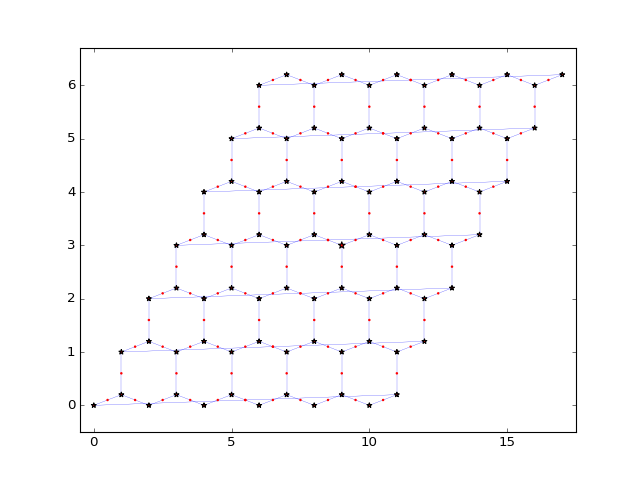

In [4]:
# Example of a stable 'chimney' with vaguely plausible parameters.
# Create colony object. 'yminusx' = z
c1 = bryo.Colony(nz=6, mz=7, OutflowConductivity=0.01, dCdt=bryo.dCdt_default,
                 dCdt_in_params={'yminusx': 1, 'b': 1, 'r': 1, 'w': 3},
                 dCdt_out_params={'yminusx': 1, 'b': 0.1, 'r': 1, 'w': 3})
# Set a central outflow conduit (edge) to have higher conductivity
c1.setouterconductivities([42], [0.02])
# Create plot
c1.colonyplot(False, linescale=0.2, dotscale=80, outflowscale=20, innerflowscale=80)

<IPython.core.display.Javascript object>


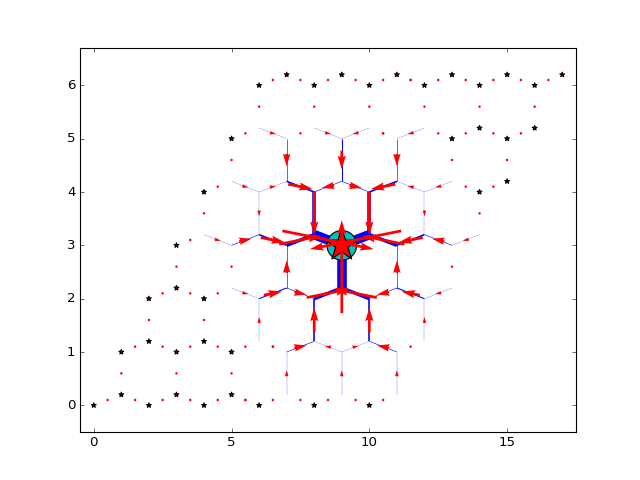

C:\Users\Michelangelo\Anaconda3\lib\site-packages\matplotlib\collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [13]:
# Solve dif. eqs. for c1, put result in c2, and plot
c2 = c1.develop(10)
c2.colonyplot(False, linescale=0.2, dotscale=80, outflowscale=20, innerflowscale=80)

<IPython.core.display.Javascript object>


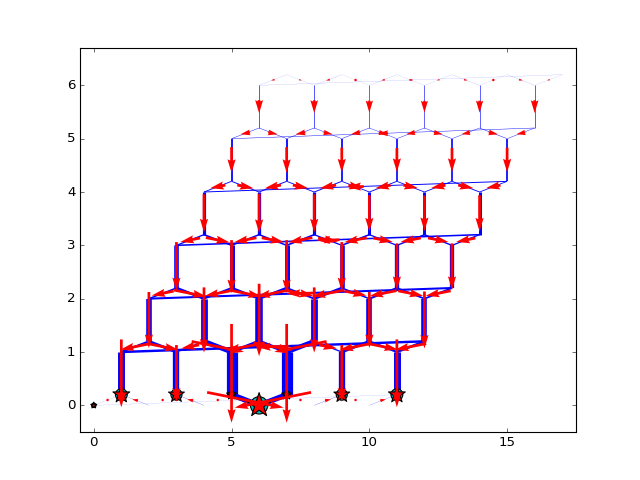

C:\Users\Michelangelo\Anaconda3\lib\site-packages\matplotlib\collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [10]:
# Perturb colony c2 by opening up outflow in lower left, then plot.
c2.setouterconductivities([0], [0.2])
c2.colonyplot(False, linescale=0.2, dotscale=80, outflowscale=20, innerflowscale=80)

<IPython.core.display.Javascript object>


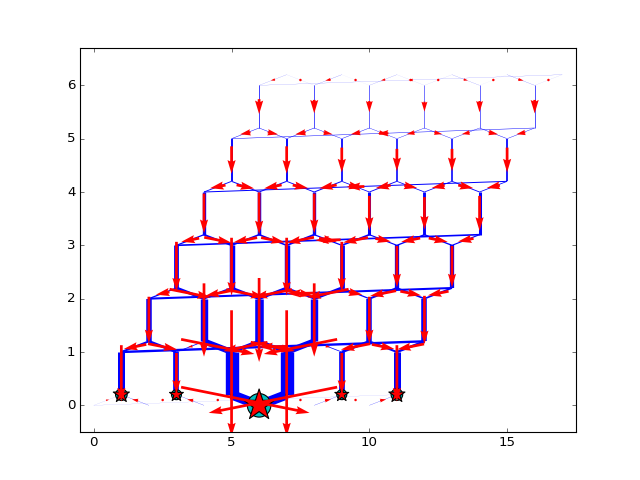

C:\Users\Michelangelo\Anaconda3\lib\site-packages\matplotlib\collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [11]:
# Solve dif. eqs. for c2 after perturbation, put in c3 & plot.
c3 = c2.develop(3)
c3.colonyplot(False, linescale=0.2, dotscale=80, outflowscale=20, innerflowscale=80)

### 1) Explanation for $\ \mathbf {G = -B'CB} $

$\ C_{i,j} = 0 \text{ for } i \neq j \implies \sum_{j=0}^{z} C_{i,j}B_{j, l} = C_{i,i}B_{i, l} $

Therefore: $\ -\sum_{i=0}^{w} \sum_{j=0}^{z} B_{i,k}C_{i,j}B_{j, l} = -\sum_{i=0}^{w}  C_{i,i}B_{i,k}B_{i, l} $

For k=l this gives the (negative) of the sum of conductivities of edges: 

$\ B_{i,k} \in {-1,0,1} \implies B_{i,k}B_{i, k} \in {0, 1} $, so $\ k = l \implies -\sum_{i=0}^{w}  C_{i,i}B_{i,k}B_{i, l} = -\sum_{i \in D} C_{i,i} $, where D is the set of all edges that connect to node k. However, $\ -\sum_{i \in D} C_{i,i} = -\sum_{j=0}^{z} N(C)_{k, j} = G_{k,k} $

Assuming only one edge (edge d) connects each pair of nodes: $\ k \neq l \implies B_{i, k}B_{i,l} = \begin{cases} 0, & i \neq d \\ -1, & i=d \end{cases} $. 

Therefore: $\ k \neq l \implies -\sum_{i=0}^{w}  C_{i,i}B_{i,k}B_{i, l} = C_{d,d} = N(C)_{k,l} = G_{k,l} $

Hence: $\ G_{k,l} = -\sum_{i=0}^{w} \sum_{j=0}^{z} B_{i,k}C_{i,j}B_{j, l} $

Or, equivalently: $\ \mathbf{G = -B'CB} $